# 2. LABORATORIJSKA VJEŽBA - PASIVNE KOMPONENTE
---
Cilj ove laboratorijske vježbe je upoznavanje s realnim karakteristikama pasivnih komponenti. Karakteristike pasivnih komponenti mjrerit će se u frekvencijskoj domeni korištenjem vektorskog analizatora mreža tj. VNA-a (engl. _Vector Network Anaylzer_). Cjeline koje se obrađuju unutar ove laboratorijske vježbe su, 
- Ovisnost impedancije kondenzaora o frekvenciji
- Ovisnost impedancije kondenatora o načinu ugradnje, vrsti kućišta i dielektrika, nominalnoj vrijednosti kapaciteta
- Kalibracija i mjerenje s VNA-om
- Modeliranje kondenzatora

# PRIPREMA
---
1. Upoznati se s $S$-parametrima i proučiti princip rada VNA
2. Nacrtati frekvencijsku karakteristiku impedancije realnog kondenzatora. Označiti karakteristična područja u karakteristici i objasniti kako se iz zadane karakteristike može konstruirati model kondenzaora.

## VNA (engl. _Vector Network Analyzer_)
U ovoj vježbi će se koristiti VNA s dva porta prikazan na slici. 

![nanovna.png](nanovna.png)

VNA je uređaj koji mjeri $S$-parametre. $S$-parametri definiraju u frekvencijskoj domeni odnose između amplituda napona upadnih $\bf{V}^+$ i reflektiranih valova $\bf{V}^-$ sljedećom jednadžbom,

\begin{equation}
\left[\bf{V}^-\right] = \left[\bf{S}\right]\left[\bf{V}^+\right] \\ \\
\end{equation}

S obzirom da se radi o mjerenju s dva porta, definiraju se amplitude napona upadnih valova $V^+_n$ i reflektiranih valova $V^-_n$ za svaki port $n$. U ovom slučaju $S$-parametri se mogu zapisati kao, 
\begin{equation}
\left[{\begin{matrix}{V^-_1}\\{V^-_2}\end{matrix}}\right] 
= \left[ \begin{matrix}S_{11} & S_{12} \\ S_{21} & S_{22}\end{matrix} \right] \left[ \begin{matrix}V^+_1\\V^+_2\end{matrix} \right] \\ \\
\end{equation}
Svaki pojedini element matrice $S$-parametara može se definirati kao
\begin{equation}
\left.S_{pq} = \frac{V^-_p}{V^+_q} \right|_{V^+_k=0\;za\;k\neq q} \\ \\
\end{equation}

Drugim riječima $S_{pq}$ parametar se određuje kada port $q$ pobuđujemo s upadnim valom amplitude $V^+_q$ i mjerimo amplitudu napona reflektiranog vala $V^-_p$ koji izlazi iz porta $p$. Tako da npr. $S_{12}$-parametar je definiran updanim valom na portu 2 $V^+_2$ i reflektiranim valom na portu 1 $V^-_1$, tako da ovaj parametar odgovara koeficijentu transmisije. Na sličan način se definira koeficijent refleksije, odnosno $S_{11}$-parametar kada se gleda upadni i reflektirani val na portu 1.

![VNA_mjerenje.png](VNA_mjerenje.png)

Iz izmjerenih $S$-parametara mogu se tranformacijama dobiti $Y$-, $Z$-, $ABCD$- ili npr. $T$-parametri. $Z$-parametri mogu se dobiti iz $S$-parametara sljedećim transformacijama koje su dostupne u [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/) Python modulu.
<br> <br>
\begin{equation}
\begin{aligned}
&\begin{aligned}
Z_{11} &=\frac{\left(\left(1+S_{11}\right)\left(1-S_{22}\right)+S_{12} S_{21}\right)}{\Delta S} Z_{0} \\ \\
Z_{12} &=\frac{2 S_{12}}{\Delta {S}} Z_{0} \\ \\
Z_{21} &=\frac{2 S_{21}}{\Delta {S}} Z_{0} \\ \\
Z_{22} &=\frac{\left(\left(1-S_{11}\right)\left(1+S_{22}\right)+S_{12} S_{21}\right)}{\Delta {S}} Z_{0}
\end{aligned}\\ \\
&\text { gdje je }\\ \\
&\Delta {S}=\left(1-S_{11}\right)\left(1-S_{22}\right)-S_{12} S_{21}
\end{aligned}
\end{equation}

Za strukutre koje se mjere u ovoj laboratorijskoj vježbi $Z$-parametri su prikladni jer postoji izravna poveznica između T-mreže i $Z$-parametara kako je prikazano slikom.

![Zparameters.jpg](Zparameters.jpg)

Impedancija $Z_2$ je jednaka impedanciji $Z_3$ i predstavlja impedanciju koaksijalnog konektora, i pristupne linije, dok je impedanacija $Z_1$ jednaka impedanciji kondenzatora i spoja kondenzatora na masu. U ovoj laboratorijskoj vježbi cilj će biti prikazati magnitudu impedancije $\left|Z_1\right|=\left|Z_{21}\right|$.


![VNA_kalibracija.png](VNA_kalibracija.png)


Prije mjerenja VNA-om potrebno je izvršiti kalibraciju. U ovoj vježbi koristit će se SOLT (engl. _S-SHORT, O-OPEN, L-LOAD i T-THRU_) kalibracija. SOLT kalibracija provodi se mjereći kalibracijske standarde poznatih karakteristika. Ukupno je potrebno provesti 7 mjerenja (za svaki port _SOL_ mjerenje i na kraju _T_ mjerenje). Kalibracijom su referentne ravnine pomaknute na kraj kabela kojim se spaja na DUT (engl. _Device Under Test_), tako da mjerenje koje se napravi nakon kalibracije odgovara karakteristikama DUT-a bez utjecaja kabela. SOLT kalibracijom se također eliminiraju sve nesavršenosti VNA-a kao što su parametri usmjernog sprežnika, refleksije unutar sustava, parametri prijamnika, itd. Međutim, ovom kalibracijom se ne mogu eliminirati pogreške uslijed utjecaja temperature, šuma, ponovljivosti konektorskih kontakata i sl.

# RAD  U LABORATORIJU
---
**VAŽNO!** Prije početka rada s instrumentom potrebno je staviti uzemljenu narukvicu. Provjerite je li narukvica ispravno spojena na uzemljenje. Provjerite je li podloga na radnom stolu uzemljena.

![ESD.png](ESD.png)

**VAŽNO!** Radi ponovljivosti spoja i očuvanja konektora obavezno koristite odgovarajući moment ključ.

![TW.jpeg](TW.jpeg)

## Uputstva za ZVB8 VNA
1. Postaviti VNA u zadane postavke i omogućiti mjerenje s oba porta
><code> <b>PRESET</b></code> <br>
><code> <b>MEAS</b>->All S-Params</code> <br>
2. Postaviti frekvencijski opseg mjerenja od 1 MHz do 1 GHz, logaritamsko mjerilo u 801 točaka
><code> <b>START/CENTER</b>->Start->1 MHz</code> <br>
><code> <b>START/CENTER</b>->Stop->1 GHz</code> <br>
><code> <b>SWEEP</b>->Number of Points->801</code> <br>
><code> <b>SWEEP</b>->Sweep Type->Log Frequency</code> <br>
3. Omogućiti deset usrednjavanja svakog mjerenja, a širinu pojasa IF (engl. _Intermediate Frequency_) signala postaviti na 10 kHz
><code> <b>POWER/BW/AVG</b>->Average Factor->10</code> <br>
><code> <b>POWER/BW/AVG</b>->Average On</code> <br>
><code> <b>POWER/BW/AVG</b>->Meas Bandwidth->10 kHz</code> <br>
4. Kalibirati VNA SOLT kalibracijom
><code> <b>CAL</b>->Start Cal->Two-Port P1-P2->TOSM</code> <br>
>- za konektore porta 1 i porta 2 odabrati konektore s kojima završavaju kabeli tj. PC 3.5 (m) <br>
>- kalibracijski kit odabrati prema uputama asistenta <br>
>- nakon spajanja kalibracijskog standarda (S,L, ili O) na kanal osciloskopa kliknuti s mišem na odgovarajuće mjesto i pričekati da se pojavi zelena kvačica (VNA radi usrednjavanje koje se može pratiti na dnu ekrana. Kada piše Avg 10/10 i pojavi se crvena zvjezdica, mjerenje je tada gotovo <br>
>- kalibracijski standard T se spaja tako da oba kanala spojimo na njega (zadnje 7. mjerenje) <br>
5. Mjerenja se pohranjuju na USB memoriju
><code> <b>SAVE</b>->Trace Data->Export Complex Data...</code> <br>
>- mjerenja se pohranjuju u Touchstone **.s2p** formatu

## Uputstva za NanoVNA

## Mjerenje zadanih komponenti
6. Izmjeriti 2-port $S$-parametere za tablicom zadane komponente. Pohraniti $S$-parametre i dodati ih u jupyter notebook okruženje

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import skrf as rf
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [9]:
fmin = 1e6
fmax = 1e9
filename1 = 'X.s2p'
label1 = 'X'
filename2 = 'X.s2p'
label2 = 'X'

7. Učitati $S$-parametre koristeći skrf, pretvoriti ih u $Z$-parametre i prikazati apsolutnu vrijednost impedancije $Z_{12}$

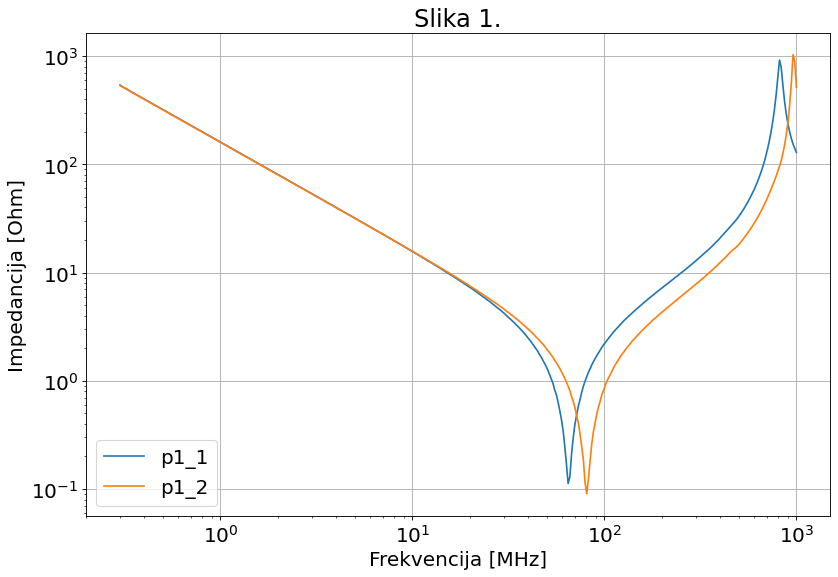

In [12]:
# učitavanje S-parametara
ntwk1 = rf.Network(filename1)
ntwk2 = rf.Network(filename2)

# pretvorba u z-parametre i izlučivanje z12
z12_1 = np.abs(np.squeeze(ntwk1.z[:,0,1]))
z12_2 = np.abs(np.squeeze(ntwk2.z[:,0,1]))

# plot
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
axes = plt.gca()    

axes.plot(ntwk1.frequency.f/1e6,z12_1, linestyle='-', label=label1)  
axes.plot(ntwk2.frequency.f/1e6,z12_2, linestyle='-', label=label2)  
    
axes.set_xscale("log")
axes.set_yscale("log")   
plt.sca(axes) 
plt.grid(axis='both')   
plt.xlabel('Frekvencija [MHz]')
plt.title('Slika 1.')
plt.ylabel('Impedancija [Ohm]')  

leg = axes.legend()

8. U čemu se razlikuju impedancije za izmjerene kondenzatore i zašto?
<br>
<br>
<br>
<br>

9. Za jedan od izmjerenih kondenzatora izračunajte sve parametre modela na slici. Za $R_2$ pretpostavite $10^6\;\Omega$.
<br>
<br>
<br>
<br>

![model.png](model.png)

In [13]:
#from PySpice.Spice.Netlist import Circuit
R1 = # ESR u [Ohm]
C = # u [F]
L = # u [H]
R2 = 1e6 # leakage resistance u [Ohm] 

In [17]:
circuit = Circuit('Cmodel')
circuit.L('L1', 'input', 'x1', float(L)@u_H)
circuit.R('R1', 'x1', 'x2', float(R1)@u_Ω)
circuit.C('C1', 'x2', circuit.gnd, float(C)@u_F)
circuit.R('R2', 'x2', circuit.gnd, float(R2)@u_F)

Resistor RR2

In [18]:
circuit.SinusoidalVoltageSource('Vin', 'input', circuit.gnd, amplitude=1@u_V)            
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator.ac(start_frequency=fmin@u_Hz, stop_frequency=fmax@u_Hz, number_of_points=101,  variation='dec')
j = 0
for branch in analysis1.branches.values():
    j = j + 1
    if j == 1:
        i = branch
impedance1 = np.asarray(analysis1.input/i)

OSError: cannot load library 'libngspice.so': libngspice.so: cannot open shared object file: No such file or directory.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libngspice.so'

NameError: name 'analysis1' is not defined

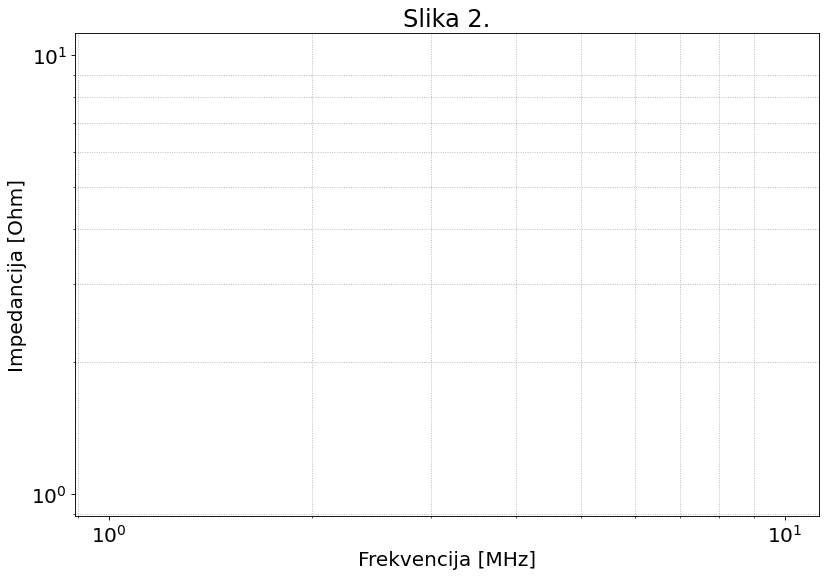

In [12]:
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
plt.grid(True,which="both",ls=":")
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")   

axes.set_xscale("log")
axes.set_yscale("log")   
plt.sca(axes) 
plt.grid(axis='both')   
plt.xlabel('Frekvencija [MHz]')
plt.title('Slika 2.')
plt.ylabel('Impedancija [Ohm]') 

axes.plot(analysis1.frequency/1e6, np.abs(np.asarray(impedance1)), linestyle='-',label='model')
#axes.plot(ntwk_1.frequency.f/1e6,z12_1, linestyle='-', label='mjerenje')  
axes.plot(ntwk_2.frequency.f/1e6,z12_2, linestyle='-', label='mjerenje') 
leg1 = axes.legend(loc='upper center')